In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
%matplotlib inline

In [3]:
#read in the data
mlc_data = pd.read_csv("../data/Matching Sample for NSS (100k Lines).xlsx - MLC Data Sample.csv")

In [4]:
#let's see what we're working with and that it was read in correctly
mlc_data.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [5]:
#let's check the tail too
mlc_data.tail()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [6]:
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = mlc_data[mlc_data.duplicated()]
duplicate = duplicate.sort_values(['Recording Title'])
print("Duplicate Rows :")
duplicate.info()

Duplicate Rows :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 288 to 99986
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISRC                                       539 non-null    object 
 1   Country Code                               539 non-null    object 
 2   Registrant Code                            539 non-null    object 
 3   Year of Reference                          539 non-null    float64
 4   Usage Period                               549 non-null    object 
 5   Streaming Platform (DSP)                   549 non-null    object 
 6   Streams                                    549 non-null    object 
 7   Recording Artist                           549 non-null    object 
 8   Recording Label                            548 non-null    object 
 9   Recording Title                            549 non-null    object 
 10  Relea

In [7]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
mlc_data = mlc_data.drop_duplicates()

In [8]:
mlc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISRC                                       97701 non-null  object 
 1   Country Code                               97764 non-null  object 
 2   Registrant Code                            97764 non-null  object 
 3   Year of Reference                          97700 non-null  float64
 4   Usage Period                               91349 non-null  object 
 5   Streaming Platform (DSP)                   95452 non-null  object 
 6   Streams                                    99451 non-null  object 
 7   Recording Artist                           99451 non-null  object 
 8   Recording Label                            98444 non-null  object 
 9   Recording Title                            99451 non-null  object 
 10  Release Title         

In [9]:
mlc_data.describe()

,Year of Reference,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
count,97700.000000,99451.000000,99451.000000
mean,19.677267,1015.395190,0.541573
std,12.653913,15586.610211,0.498271
min,0.000000,0.000000,0.000000
25%,17.000000,149.000000,0.000000
50%,19.000000,190.000000,1.000000
75%,20.000000,235.000000,1.000000
max,99.000000,818738.000000,1.000000


In [10]:
#false=0, true=1. this shows count of null values for each column.
mlc_data.isnull().sum()

ISRC                                         1750
Country Code                                 1687
Registrant Code                              1687
Year of Reference                            1751
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1007
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [11]:
#value counts of unique values (excluding nulls) in given column.
mlc_data['Recording Artist'].value_counts()

Various artists               964
Lil Durk                      445
Zach Bryan                    390
Youngboy Never Broke Again    333
Taylor Swift                  313
                             ... 
Maranatha! Latin                1
Nerv                            1
Farruko,Bad Bunny               1
Thibaut Garcia                  1
Loud Bunch Kids                 1
Name: Recording Artist, Length: 21149, dtype: int64

In [12]:
#value counts of unique values (excluding nulls) in given column.
mlc_data['Streaming Platform (DSP)'].value_counts()

Spotify               32078
Apple                 22069
Amazon                14327
Pandora               13742
Tidal                  3515
YouTube                2747
SoundCloud             2120
GTL                    1025
Melodyv                 826
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 315
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: Streaming Platform (DSP), dtype: int64

In [13]:
mlc_data['Usage Period'].value_counts()

3/1/2021    39408
1/1/2021    16465
2/1/2021    13451
4/1/2021    12190
5/1/2021     9835
Name: Usage Period, dtype: int64

In [14]:
#count of unique values in that column (result is x unique names in dataframe)
mlc_data['Recording Artist'].nunique()

21149

In [15]:
#set the seaborn theme, style, color palette
#sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
#sns.pairplot(mlc_data);

In [16]:
#when I attempted to convert streams to int, got an error due to whitespaces. let's try to remove those
#this will require converting them to strings first
#documentation: https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
#documentation: https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/
mlc_data['Streams'] = mlc_data['Streams'].astype(str).str.strip()

In [17]:
#to calculate based on streams, need to convert to int
#at first, was getting ValueError: count not convert string to float. need to remove commas.
mlc_data['Streams'] = mlc_data['Streams'].apply(lambda x: int(float(x.replace(',',''))))

In [18]:
#I want to try aggregating this data by streaming platform, artist, recording duration, etc to see how these factors 
#impact number of streams
#going off this documentation: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#let's start by grouping by artist
#and ordering by number of streams DESC
grouped_artist = mlc_data.groupby('Recording Artist')[['Streams']].sum().sort_values(['Streams'],ascending=False)
grouped_artist.head(20)

,Streams
Recording Artist,
Lil Durk,77580707
Rod Wave,76457852
Taylor Swift,65853112
Pooh Shiesty,60734440
Moneybagg Yo,44210532
Drake,33514252
Spotemgottem,30475307
DJ Khaled,30445217
Morgan Wallen,29287713


<AxesSubplot:ylabel='Recording Duration (Seconds)'>

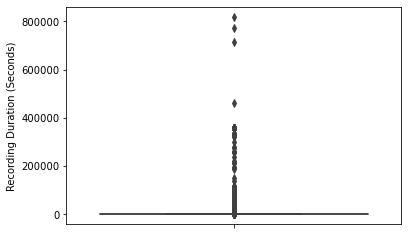

In [19]:
sns.boxplot(y=mlc_data['Recording Duration (Seconds)'])

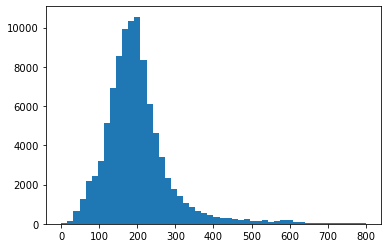

In [20]:
plt.hist('Recording Duration (Seconds)', bins = 50, range = (0, 800), data = mlc_data);

In [21]:
grouped_platform = mlc_data.groupby('Streaming Platform (DSP)')[['Streams']].sum().sort_values(['Streams'],ascending=False)

#without resetting index, it throws an error when attempting to plot, because streaming platform is viewed as index
grouped_platform = grouped_platform.reset_index()
grouped_platform.head(20)

,Streaming Platform (DSP),Streams
0,Spotify,2541603117
1,Apple,1599105573
2,Pandora,873279784
3,SoundCloud,166695457
4,YouTube,157979368
5,Amazon,149591499
6,Tidal,48743502
7,AudioMack,11991559
8,Melodyv,5349429
9,iHeart Radio,2141959


In [22]:
grouped_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Streaming Platform (DSP)  29 non-null     object
 1   Streams                   29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


In [23]:
# plt.figure(figsize = (20,10))
# sns.set(style="white")
# sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Arial'})
# sns.set_context("poster", font_scale = .6)
# sns.barplot(x = 'Streams', y = 'Streaming Platform (DSP)', data = grouped_platform, palette = 'Purples_r')
# plt.xlabel('')
# plt.ylabel('')
# sns.despine(left=True, right=True, bottom=True, top=True)
# plt.title('Streams by Platform');

In [24]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-run
%run genre_prep.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12950 entries, 0 to 12949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  12950 non-null  object
 1   genre   12950 non-null  object
dtypes: object(2)
memory usage: 202.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1626 non-null   object
 1   genre   1626 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   4248 non-null   object
 1   artist  4248 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.5+ KB


In [25]:
genres_melt.head()

,artist,genre
0,The Jeff Healey Band,ROCK
1,The Jeff Healey Band,JAZZ
2,The Jeff Healey Band,BLUES
3,Piotr Anderszewski,CLASSICAL
4,Inigo Pascual,PINOY POP


In [26]:
#trim whitespace from genre & artist columns in both dataframes to ensure most accurate join/counts
genres_melt.genre = genres_melt.genre.str.strip()
genres_melt.artist = genres_melt.artist.str.strip()
mlc_data['Recording Artist'] = mlc_data['Recording Artist'].str.strip()

In [27]:
# merge mlc_data and genres_melt
# https://stackoverflow.com/questions/29761915/case-insensitive-pandas-dataframe-merge
mlc_data['recording_artist_upper'] = mlc_data['Recording Artist'].str.upper()
genres_melt['artist_upper'] = genres_melt['artist'].str.upper()
mlc_and_genres = mlc_data.merge(genres_melt, left_on="recording_artist_upper", right_on="artist_upper", how="left")
mlc_and_genres.head(100)

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",recording_artist_upper,artist,genre,artist_upper
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,FUTURE,NaN,NaN,NaN
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,LUCKY3RD,NaN,NaN,NaN
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,LUCKY3RD,NaN,NaN,NaN
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,BACHATA & MERENGUE MIX,NaN,NaN,NaN
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,FOOLIO,NaN,NaN,NaN
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0,X0O0X_,NaN,NaN,NaN
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1,QUENTIN MILLER,Quentin Miller,HIP HOP,QUENTIN MILLER
7,QMJMT2103634,QM,JMT,21.0,2/1/2021,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0,NF,NaN,NaN,NaN
8,USRC12100543,US,RC1,21.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,2WORTH,NaN,NaN,NaN
9,USAT22007048,US,AT2,20.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,2WORTH,NaN,NaN,NaN


In [28]:
mlc_and_genres.tail(100)

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",recording_artist_upper,artist,genre,artist_upper
166799,SEBGA2000205,SE,BGA,20.0,3/1/2021,Spotify,103380,YOASOBI,YOASOBI,群青,THE BOOK,249,1,YOASOBI,YOASOBI,J-POP,YOASOBI
166800,QZES52178131,QZ,ES5,21.0,1/1/2021,Spotify,95222,YOASOBI,YOASOBI,群青,群青,249,1,YOASOBI,YOASOBI,J-POP,YOASOBI
166801,QZNN22197736,QZ,NN2,21.0,4/1/2021,Spotify,66121,YOASOBI,YOASOBI,群青,群青,249,1,YOASOBI,YOASOBI,J-POP,YOASOBI
166802,QZNN22197736,QZ,NN2,21.0,3/1/2021,Spotify,35242,YOASOBI,YOASOBI,群青,群青,249,1,YOASOBI,YOASOBI,J-POP,YOASOBI
166803,SEBGA1902980,SE,BGA,19.0,5/1/2021,Spotify,64202,YOASOBI,YOASOBI,群青,群青,249,1,YOASOBI,YOASOBI,J-POP,YOASOBI
166804,FR6V81080374,FR,6V8,10.0,4/1/2021,Apple,11869,YOASOBI,YOASOBI,群青,THE BOOK,248,1,YOASOBI,YOASOBI,J-POP,YOASOBI
166805,SEBGA2000207,SE,BGA,20.0,3/1/2021,Spotify,17394,JJ Lin,Ocean Butterflies,背對背擁抱,JJ林俊傑100天,235,0,JJ LIN,JJ Lin,DANCEPOP,JJ LIN
166806,SEBGA2000207,SE,BGA,20.0,3/1/2021,Spotify,17394,JJ Lin,Ocean Butterflies,背對背擁抱,JJ林俊傑100天,235,0,JJ LIN,JJ Lin,CHINESE ROCK,JJ LIN
166807,SEBGA2000207,SE,BGA,20.0,3/1/2021,Spotify,17394,JJ Lin,Ocean Butterflies,背對背擁抱,JJ林俊傑100天,235,0,JJ LIN,JJ Lin,MANDOPOP,JJ LIN
166808,SEBGA1902991,SE,BGA,19.0,3/1/2021,Apple,10137,Linked Horizon,PONY CANYON,自由の翼,自由への進撃 - Single,328,0,LINKED HORIZON,Linked Horizon,ART ROCK,LINKED HORIZON


In [29]:
#false=0, true=1. this shows count of null values for each column.
mlc_and_genres.isnull().sum()

ISRC                                          2892
Country Code                                  2790
Registrant Code                               2790
Year of Reference                             2895
Usage Period                                 13139
Streaming Platform (DSP)                      6064
Streams                                          0
Recording Artist                                 0
Recording Label                               2005
Recording Title                                  0
Release Title                                  146
Recording Duration (Seconds)                     0
Songwriter's Listed (1 = "Yes", 0 = "No")        0
recording_artist_upper                           0
artist                                       66971
genre                                        66971
artist_upper                                 66971
dtype: int64

In [30]:
mlc_and_genres.count()

ISRC                                         164007
Country Code                                 164109
Registrant Code                              164109
Year of Reference                            164004
Usage Period                                 153760
Streaming Platform (DSP)                     160835
Streams                                      166899
Recording Artist                             166899
Recording Label                              164894
Recording Title                              166899
Release Title                                166753
Recording Duration (Seconds)                 166899
Songwriter's Listed (1 = "Yes", 0 = "No")    166899
recording_artist_upper                       166899
artist                                        99928
genre                                         99928
artist_upper                                  99928
dtype: int64

In [31]:
genre_counts = mlc_and_genres.genre.value_counts()
genre_counts.head()

HIP HOP        16503
TRAP            5591
R&B             4492
POP             3903
GANGSTA RAP     2363
Name: genre, dtype: int64

In [32]:
#read in royalties data
royalties = pd.read_csv("../data/royalties_per_platform.csv")

#order by royalties_per_stream
royalties = royalties.sort_values(['royalties_per_stream'],ascending=False)

royalties.head(10)

,platform,royalties_per_stream,source
0,Tidal,0.012840,https://producerhive.com/music-marketing-tips/...
1,Apple,0.008000,https://producerhive.com/music-marketing-tips/...
2,Amazon,0.004020,https://producerhive.com/music-marketing-tips/...
7,SoundCloud,0.003275,https://producerhive.com/music-marketing-tips/...
3,Spotify,0.003180,https://producerhive.com/music-marketing-tips/...
4,YouTube,0.002000,https://producerhive.com/music-marketing-tips/...
5,Pandora,0.001330,https://producerhive.com/music-marketing-tips/...
6,Deezer,0.001100,https://producerhive.com/music-marketing-tips/...


[Text(5, 0, '0.01284'),
 Text(5, 0, '0.008'),
 Text(5, 0, '0.00402'),
 Text(5, 0, '0.003275'),
 Text(5, 0, '0.00318'),
 Text(5, 0, '0.002'),
 Text(5, 0, '0.00133'),
 Text(5, 0, '0.0011')]

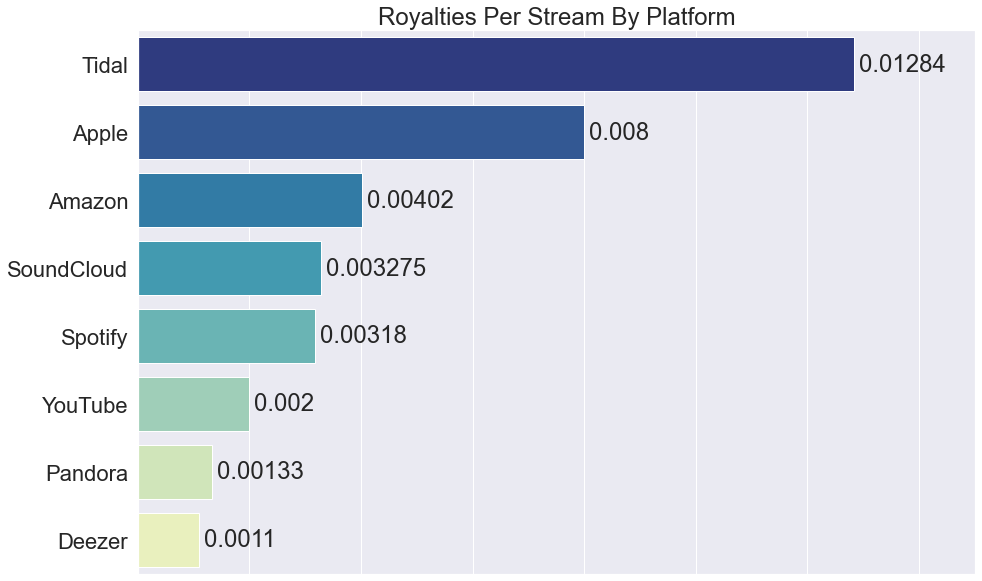

In [33]:
#set size paramaters for chart
#https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
rcParams['figure.figsize'] = 15,10

#make fonts bigger
sns.set(font_scale = 2)

#royalties by platform visualization
royalties_g = sns.barplot(x="royalties_per_stream", y="platform", data=royalties,
                 palette="YlGnBu_r")

#make plot bigger so value labels don't run off graph
#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xlim-in-python/
royalties_g.set_xlim(0, 0.015)

#add chart title
royalties_g.set_title("Royalties Per Stream By Platform")

#remove x axis label and values
#https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot
royalties_g.set(xlabel=None)
royalties_g.set(xticklabels=[])

#remove y axis label
royalties_g.set(ylabel=None)

#add value labels to each bar
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html
royalties_g.bar_label(royalties_g.containers[0], padding=5)

In [34]:
#join mlc_and_genres with royalties to combine genre (g) and royalties (r) data
g_and_r = mlc_and_genres.merge(royalties, left_on="Streaming Platform (DSP)", right_on="platform", how="left")
g_and_r.head(100)

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",recording_artist_upper,artist,genre,artist_upper,platform,royalties_per_stream,source
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,FUTURE,NaN,NaN,NaN,NaN,NaN,NaN
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,LUCKY3RD,NaN,NaN,NaN,SoundCloud,0.003275,https://producerhive.com/music-marketing-tips/...
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,LUCKY3RD,NaN,NaN,NaN,SoundCloud,0.003275,https://producerhive.com/music-marketing-tips/...
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,BACHATA & MERENGUE MIX,NaN,NaN,NaN,NaN,NaN,NaN
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,FOOLIO,NaN,NaN,NaN,NaN,NaN,NaN
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0,X0O0X_,NaN,NaN,NaN,Spotify,0.003180,https://producerhive.com/music-marketing-tips/...
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1,QUENTIN MILLER,Quentin Miller,HIP HOP,QUENTIN MILLER,Apple,0.008000,https://producerhive.com/music-marketing-tips/...
7,QMJMT2103634,QM,JMT,21.0,2/1/2021,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0,NF,NaN,NaN,NaN,Amazon,0.004020,https://producerhive.com/music-marketing-tips/...
8,USRC12100543,US,RC1,21.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,2WORTH,NaN,NaN,NaN,Spotify,0.003180,https://producerhive.com/music-marketing-tips/...
9,USAT22007048,US,AT2,20.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,2WORTH,NaN,NaN,NaN,Spotify,0.003180,https://producerhive.com/music-marketing-tips/...


In [35]:
royalties = g_and_r[['Streaming Platform (DSP)', 'Streams', 'Recording Artist', 'Recording Title', 'genre', 'royalties_per_stream']].copy()
royalties.head(100)

,Streaming Platform (DSP),Streams,Recording Artist,Recording Title,genre,royalties_per_stream
0,AudioMack,10175,Future,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,NaN,NaN
1,SoundCloud,8597,LUCKY3RD,Keep It Cool LUCKY3RD,NaN,0.003275
2,SoundCloud,261280,LUCKY3RD,Life Goes On LUCKY3RD,NaN,0.003275
3,Trebel,5,Bachata & Merengue Mix,No dudes de mi- Merengue & Bachata Mix,NaN,NaN
4,AudioMack,62105,Foolio,WHEN I SEE YOU REMIX,NaN,NaN
5,Spotify,8133,x0o0x_,______,NaN,0.003180
6,Apple,5839,Quentin Miller,_A_ (feat. Pe$o),HIP HOP,0.008000
7,Amazon,7842,NF,-Interlude-,NaN,0.004020
8,Spotify,28419,2worth,¡!gu4na:D////:>_<^^,NaN,0.003180
9,Spotify,28419,2worth,¡!gu4na:D////:>_<^^,NaN,0.003180


In [36]:
royalties.columns = ['platform', 'streams', 'artist', 'song', 'genre', 'royalties_per_stream']
royalties.head(20)

,platform,streams,artist,song,genre,royalties_per_stream
0,AudioMack,10175,Future,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,NaN,NaN
1,SoundCloud,8597,LUCKY3RD,Keep It Cool LUCKY3RD,NaN,0.003275
2,SoundCloud,261280,LUCKY3RD,Life Goes On LUCKY3RD,NaN,0.003275
3,Trebel,5,Bachata & Merengue Mix,No dudes de mi- Merengue & Bachata Mix,NaN,NaN
4,AudioMack,62105,Foolio,WHEN I SEE YOU REMIX,NaN,NaN
5,Spotify,8133,x0o0x_,______,NaN,0.003180
6,Apple,5839,Quentin Miller,_A_ (feat. Pe$o),HIP HOP,0.008000
7,Amazon,7842,NF,-Interlude-,NaN,0.004020
8,Spotify,28419,2worth,¡!gu4na:D////:>_<^^,NaN,0.003180
9,Spotify,28419,2worth,¡!gu4na:D////:>_<^^,NaN,0.003180


In [37]:
#now, drop all rows w/ NaN genre
royalties = royalties[royalties['genre'].notna()]
royalties.head(20)

,platform,streams,artist,song,genre,royalties_per_stream
6,Apple,5839,Quentin Miller,_A_ (feat. Pe$o),HIP HOP,0.00800
14,Spotify,8822,Duelo,¿Cómo Evitar?,TEJANO,0.00318
15,Spotify,8822,Duelo,¿Cómo Evitar?,NORTEÑO,0.00318
16,Spotify,10141,Jenni Rivera,¿Cuánto Te Debo? - En Vivo Banda,LATIN POP,0.00318
17,Spotify,10141,Jenni Rivera,¿Cuánto Te Debo? - En Vivo Banda,REGIONAL MEXICAN,0.00318
23,Pandora,16935,Cultura Profética,¿Qué Será? / Ritmo Que Pesa / Suelta los Amarr...,REGGAE EN ESPAÑOLREGGAEROOTS REGGAE,0.00133
31,Spotify,428712,girl in red,.,LO-FI,0.00318
32,Spotify,428712,girl in red,.,BEDROOM POP,0.00318
33,Spotify,428712,girl in red,.,INDIE ROCK,0.00318
34,Spotify,428712,girl in red,.,DREAM POP,0.00318


In [38]:
royalties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99928 entries, 6 to 166898
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   platform              96850 non-null  object 
 1   streams               99928 non-null  int64  
 2   artist                99928 non-null  object 
 3   song                  99928 non-null  object 
 4   genre                 99928 non-null  object 
 5   royalties_per_stream  90406 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.3+ MB


In [39]:
#create column that calculates total royalties by multiplying streams * royalties_per_stream
#https://www.adamsmith.haus/python/answers/how-to-multiply-two-pandas-dataframe-columns-in-python#:~:text=Use%20DataFrame%20indexing%20to%20multiply,result%20to%20a%20new%20column.
royalties["earnings"] = royalties["streams"] * royalties["royalties_per_stream"]
royalties.head(20)

,platform,streams,artist,song,genre,royalties_per_stream,earnings
6,Apple,5839,Quentin Miller,_A_ (feat. Pe$o),HIP HOP,0.00800,46.71200
14,Spotify,8822,Duelo,¿Cómo Evitar?,TEJANO,0.00318,28.05396
15,Spotify,8822,Duelo,¿Cómo Evitar?,NORTEÑO,0.00318,28.05396
16,Spotify,10141,Jenni Rivera,¿Cuánto Te Debo? - En Vivo Banda,LATIN POP,0.00318,32.24838
17,Spotify,10141,Jenni Rivera,¿Cuánto Te Debo? - En Vivo Banda,REGIONAL MEXICAN,0.00318,32.24838
23,Pandora,16935,Cultura Profética,¿Qué Será? / Ritmo Que Pesa / Suelta los Amarr...,REGGAE EN ESPAÑOLREGGAEROOTS REGGAE,0.00133,22.52355
31,Spotify,428712,girl in red,.,LO-FI,0.00318,1363.30416
32,Spotify,428712,girl in red,.,BEDROOM POP,0.00318,1363.30416
33,Spotify,428712,girl in red,.,INDIE ROCK,0.00318,1363.30416
34,Spotify,428712,girl in red,.,DREAM POP,0.00318,1363.30416


In [40]:
#NOTE: the means and counts can't be taken seriously, since songs with more than one genre are counted multiple times.
royalties.describe()

,streams,royalties_per_stream,earnings
count,9.992800e+04,90406.000000,90406.000000
mean,6.445834e+04,0.004595,328.550973
std,3.118681e+05,0.002954,1886.961906
min,1.000000e+00,0.001100,0.005320
25%,5.372500e+03,0.003180,21.249720
50%,1.522000e+04,0.004020,66.968000
75%,3.934200e+04,0.008000,178.779600
max,1.725926e+07,0.012840,138074.080000


In [41]:
#find top earning song
royalties.loc[royalties['earnings'] == royalties['earnings'].max()]

,platform,streams,artist,song,genre,royalties_per_stream,earnings
148324,Apple,17259260,Rod Wave,Tombstone,R&B,0.008,138074.08
148325,Apple,17259260,Rod Wave,Tombstone,SOUL-TRAP,0.008,138074.08
148326,Apple,17259260,Rod Wave,Tombstone,HIP HOP,0.008,138074.08


In [42]:
genre_streams_count = royalties.groupby('genre')[['streams']].sum().sort_values(['streams'],ascending=False)
genre_streams_count.head(20)

,streams
genre,
HIP HOP,1297378425
TRAP,548508754
R&B,381897889
POP,341133006
GANGSTA RAP,210362617
COUNTRY,177612195
DRILL,175125953
POP ROCK,122355434
ROCK,122190362


In [43]:
genre_streams_count.tail(20)

,streams
genre,
NEOTRADITIONALIST COUNTRY,191
ALTERNATIVE COMEDY,162
POP ROCKPOST-PUNKPROGRESSIVE ROCKGOTH ROCK,43
BITPOP,35
REGGAETÓN,16
COUNTRY-SOUL,15
SYNTHETIC SOUL,15
NATIVE AMERICAN HIP HOP,10
NEO JAZZ,10


In [44]:
genre_streams_avg = royalties.groupby('genre')[['streams']].mean().sort_values(['streams'],ascending=False)
genre_streams_avg.head(30)

,streams
genre,
PIANO ROCK,1.382509e+06
SHOW TUNES,5.718416e+05
TECHNOBANDA,4.519870e+05
OLD SCHOOL HIP HOP,4.109610e+05
BRO-COUNTRY,4.018160e+05
ALTERNATIVE POP,3.477491e+05
SOUL-TRAP,3.146414e+05
VOCAL POP,2.824470e+05
SATIRICAL,2.585753e+05


In [45]:
genre_streams_avg.tail(20)

,streams
genre,
ALTERNATIVE COUNTRY,134.0
ALTERNATIVE COMEDY,54.0
POP ROCKPOST-PUNKPROGRESSIVE ROCKGOTH ROCK,43.0
BITPOP,35.0
REGGAETÓN,16.0
SYNTHETIC SOUL,15.0
COUNTRY-SOUL,15.0
NEO JAZZ,10.0
NATIVE AMERICAN HIP HOP,10.0


In [46]:
genre_earnings_total = royalties.groupby('genre')[['earnings']].sum().sort_values(['earnings'],ascending=False).reset_index()

genre_earnings_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genre     992 non-null    object 
 1   earnings  992 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.6+ KB


In [47]:
#how many genres made no money?
genre_earnings_total['earnings'].value_counts()

0.000000e+00    37
1.315104e+01     5
1.901460e+01     4
4.948800e+01     4
3.960873e+01     3
9.399270e+02     3
3.559971e+02     3
3.452718e+02     3
2.968880e+02     3
2.536057e+02     3
1.572351e+02     3
8.034906e+01     3
1.024787e+02     3
2.945952e+01     3
1.685293e+01     3
3.149174e+01     2
4.117891e+02     2
2.337116e+02     2
2.341657e+02     2
2.064672e+01     2
2.793798e+02     2
7.577700e+00     2
7.316400e+00     2
3.926012e+02     2
4.142312e+02     2
1.724318e+02     2
4.501382e+02     2
4.769793e+02     2
7.034694e+02     2
2.356760e+00     2
9.975215e+02     2
1.124718e+03     2
2.471624e+03     2
2.473344e+03     2
1.806990e+02     2
2.101254e+01     2
3.463184e+01     2
7.575078e+01     2
3.585840e+01     2
3.727724e+01     2
4.924059e+01     2
2.678753e+01     2
5.158538e+01     2
6.222100e+01     2
6.427966e+01     2
7.226289e+01     2
7.914032e+01     2
1.555063e+02     2
2.477800e+01     2
8.985504e+01     2
3.562105e+04     2
1.061488e+02     2
1.064410e+02

In [48]:
#drop nan earnings
genre_earnings_total = genre_earnings_total[genre_earnings_total['earnings'].notna()]

genre_earnings_total.head(20)

,genre,earnings
0,HIP HOP,7.203475e+06
1,TRAP,3.381173e+06
2,R&B,2.080874e+06
3,POP,1.606652e+06
4,DRILL,1.155682e+06
5,GANGSTA RAP,1.101648e+06
6,COUNTRY,7.315885e+05
7,ROCK,5.007323e+05
8,SOUL-TRAP,4.613215e+05
9,POP ROCK,4.155289e+05


In [49]:
#top 10 genre by total earnings dataframe
top_genre_earnings_total = pd.DataFrame(genre_earnings_total.nlargest(10, ['earnings'])).sort_values(['earnings'],ascending=False)
top_genre_earnings_total.columns = ['genre', 'total earnings']
top_genre_earnings_total['total earnings'] = round(top_genre_earnings_total['total earnings'],2)
top_genre_earnings_total.head(10)

,genre,total earnings
0,HIP HOP,7203474.73
1,TRAP,3381173.32
2,R&B,2080873.54
3,POP,1606652.25
4,DRILL,1155681.75
5,GANGSTA RAP,1101647.78
6,COUNTRY,731588.47
7,ROCK,500732.31
8,SOUL-TRAP,461321.52
9,POP ROCK,415528.92


[Text(5, 0, '7203474.73'),
 Text(5, 0, '3381173.32'),
 Text(5, 0, '2080873.54'),
 Text(5, 0, '1606652.25'),
 Text(5, 0, '1155681.75'),
 Text(5, 0, '1101647.78'),
 Text(5, 0, '731588.47'),
 Text(5, 0, '500732.31'),
 Text(5, 0, '461321.52'),
 Text(5, 0, '415528.92')]

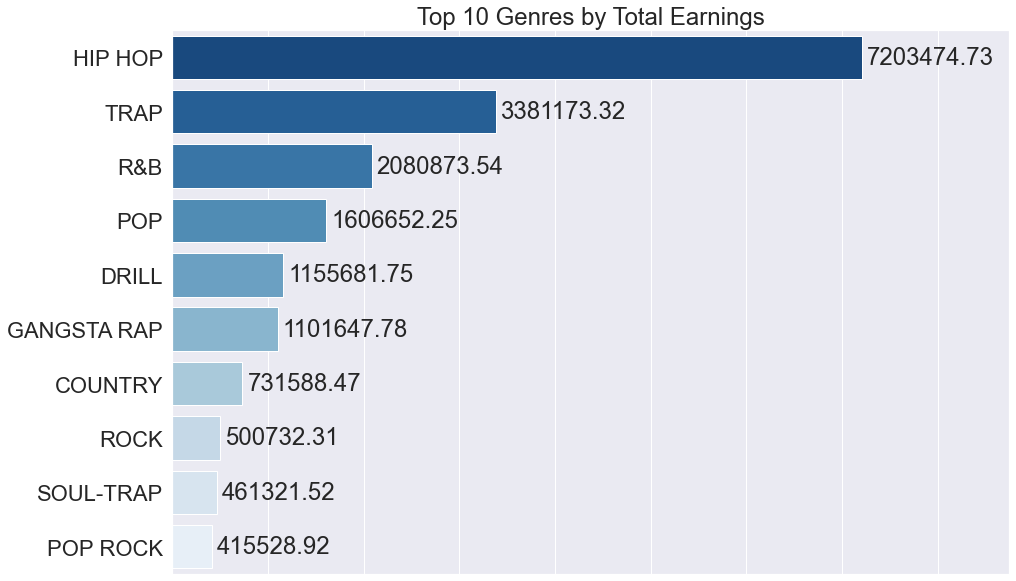

In [50]:
#top 10 genres by total earning visualization
top_genres_earnings_total_g = sns.barplot(x="total earnings", y="genre", data=top_genre_earnings_total,
                 palette="Blues_r")

#make plot bigger so value labels don't run off graph
#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xlim-in-python/
top_genres_earnings_total_g.set_xlim(0, 8750000)

#add chart title
top_genres_earnings_total_g.set_title("Top 10 Genres by Total Earnings")

#remove x axis label and values
#https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot
top_genres_earnings_total_g.set(xlabel=None)
top_genres_earnings_total_g.set(xticklabels=[])

#remove y axis label
top_genres_earnings_total_g.set(ylabel=None)

#add value labels to each bar
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html
top_genres_earnings_total_g.bar_label(top_genres_earnings_total_g.containers[0], fmt='%s', padding=5)

In [51]:
genre_earnings_total.tail(20)

,genre,earnings
972,BITPOP,0.0
973,SYNTHETIC SOUL,0.0
974,OLDSCHOOL,0.0
975,RAPCORE,0.0
976,NUEVO FLAMENCO,0.0
977,REGGAE / SKA,0.0
978,ARABIC,0.0
979,NEW BLUES,0.0
980,NEOTRADITIONALIST COUNTRY,0.0
981,BOLLYWOOD,0.0


In [52]:
#how many genres made no money?
genre_earnings_total['earnings'].value_counts()

0.000000e+00    37
1.315104e+01     5
1.901460e+01     4
4.948800e+01     4
3.960873e+01     3
9.399270e+02     3
3.559971e+02     3
3.452718e+02     3
2.968880e+02     3
2.536057e+02     3
1.572351e+02     3
8.034906e+01     3
1.024787e+02     3
2.945952e+01     3
1.685293e+01     3
3.149174e+01     2
4.117891e+02     2
2.337116e+02     2
2.341657e+02     2
2.064672e+01     2
2.793798e+02     2
7.577700e+00     2
7.316400e+00     2
3.926012e+02     2
4.142312e+02     2
1.724318e+02     2
4.501382e+02     2
4.769793e+02     2
7.034694e+02     2
2.356760e+00     2
9.975215e+02     2
1.124718e+03     2
2.471624e+03     2
2.473344e+03     2
1.806990e+02     2
2.101254e+01     2
3.463184e+01     2
7.575078e+01     2
3.585840e+01     2
3.727724e+01     2
4.924059e+01     2
2.678753e+01     2
5.158538e+01     2
6.222100e+01     2
6.427966e+01     2
7.226289e+01     2
7.914032e+01     2
1.555063e+02     2
2.477800e+01     2
8.985504e+01     2
3.562105e+04     2
1.061488e+02     2
1.064410e+02

In [66]:
#bottom 10 genre by avg earnings dataframe
bottom_genre_earnings_total = pd.DataFrame(genre_earnings_total.nsmallest(47, ['earnings'], keep='all')).sort_values(['earnings'],ascending=False)
bottom_genre_earnings_total.columns = ['genre', 'total earnings']
bottom_genre_earnings_total['total earnings'] = round(bottom_genre_earnings_total['total earnings'],2)

#eliminate genres with zero earnings
#https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero
bottom_genre_earnings_total = bottom_genre_earnings_total[(bottom_genre_earnings_total != 0).all(1)]

bottom_genre_earnings_total.head(40)

,genre,total earnings
945,MELODIC DUBSTEP,6.16
946,VOCAL TRANCE,5.94
947,TSUGARU-JAMISEN,5.23
948,NEW-AGE (DISAVOWED BY ARTIST),5.03
949,K-HIP HOP,4.67
950,ELECTRO-SOUL,3.74
951,ROOTS REVIVAL,3.60
953,JUKE JOINT BLUES,2.36
952,HILL COUNTRY BLUES,2.36
954,ALTERNATIVE COMEDY,0.22


In [53]:
genre_earnings_avg = royalties.groupby('genre')[['earnings']].mean().sort_values(['earnings'],ascending=False)

#drop nan earnings
genre_earnings_avg = genre_earnings_avg[genre_earnings_avg['earnings'].notna()]

genre_earnings_avg.head(30)

,earnings
genre,
SOUL-TRAP,2165.828739
PIANO ROCK,1853.189000
EXPERIMENTAL HIP HOP,1554.991598
ALTERNATIVE POP,1245.202439
HIP HOP • TRAP • GANGSTA RAP,1220.192364
SATIRICAL,1167.089758
CHRISTIAN POP-ROCK,1155.359570
CLOUD RAP (EARLY),1085.195129
DRILL,1006.691422


In [54]:
genre_earnings_avg.tail(30)

,earnings
genre,
PROTO-PUNK,7.087260
NEOFOLK,6.926368
ETHNIC MUSIC,6.926368
DISCO-PUNK,6.852090
SON JALISCIENCE,6.575520
JARABE,6.575520
BOLERO RANCHERO,6.575520
HUAPANGO DE MARIACHI,6.575520
SON JAROCHO AND VALS MEXICANO.,6.575520


In [55]:
#bottom 10 genre by avg earnings dataframe
bottom_genre_earnings_avg = pd.DataFrame(genre_earnings_avg.nsmallest(10, ['earnings'])).sort_values(['earnings'],ascending=False).reset_index()
bottom_genre_earnings_avg.columns = ['genre', 'average earnings']
bottom_genre_earnings_avg['average earnings'] = round(bottom_genre_earnings_avg['average earnings'],2)
bottom_genre_earnings_avg.head(10)

,genre,average earnings
0,K-HIP HOP,4.67
1,OFF-COLOR HUMOR,3.74
2,ELECTRO-SOUL,3.74
3,ROOTS REVIVAL,3.60
4,ELECTROCUMBIA,3.10
5,HILL COUNTRY BLUES,2.36
6,JUKE JOINT BLUES,2.36
7,LENTO VIOLENTO,1.19
8,GOA TRANCE,0.83
9,ALTERNATIVE COMEDY,0.07


[Text(5, 0, '4.67'),
 Text(5, 0, '3.74'),
 Text(5, 0, '3.74'),
 Text(5, 0, '3.6'),
 Text(5, 0, '3.1'),
 Text(5, 0, '2.36'),
 Text(5, 0, '2.36'),
 Text(5, 0, '1.19'),
 Text(5, 0, '0.83'),
 Text(5, 0, '0.07')]

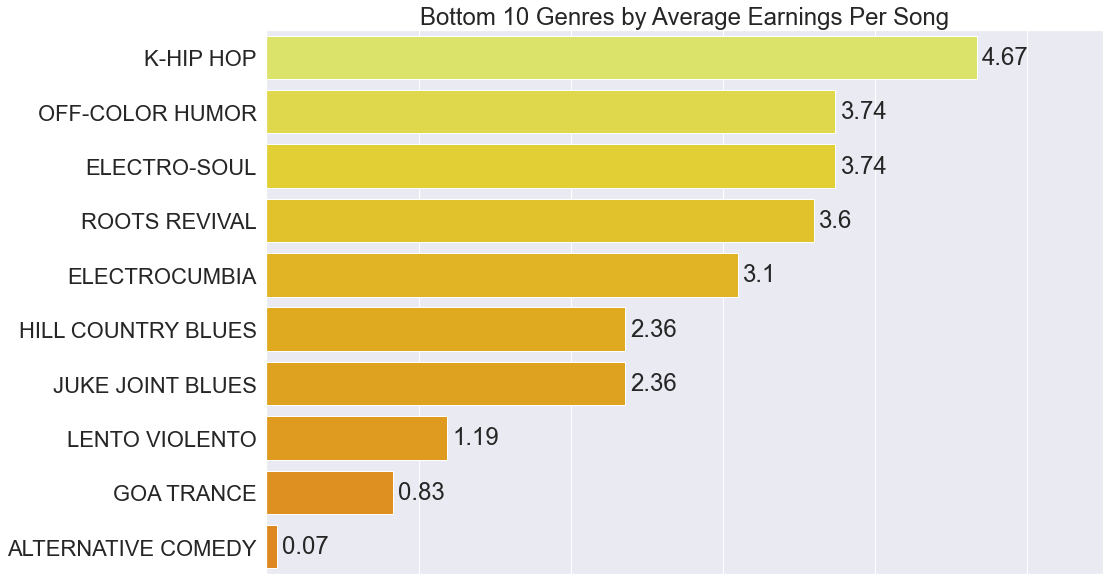

In [56]:
#bottom 10 genres by avg earning visualization
bottom_genres_earnings_avg_g = sns.barplot(x="average earnings", y="genre", data=bottom_genre_earnings_avg,
                 palette="Wistia")

#make plot bigger so value labels don't run off graph
#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xlim-in-python/
bottom_genres_earnings_avg_g.set_xlim(0, 5.5)

#add chart title
bottom_genres_earnings_avg_g.set_title("Bottom 10 Genres by Average Earnings Per Song")

#remove x axis label and values
#https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot
bottom_genres_earnings_avg_g.set(xlabel=None)
bottom_genres_earnings_avg_g.set(xticklabels=[])

#remove y axis label
bottom_genres_earnings_avg_g.set(ylabel=None)

#add value labels to each bar
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html
bottom_genres_earnings_avg_g.bar_label(bottom_genres_earnings_avg_g.containers[0], padding=5)

In [57]:
#top 10 genre by avg earnings dataframe
top_genre_earnings_avg = pd.DataFrame(genre_earnings_avg.nlargest(10, ['earnings'])).sort_values(['earnings'],ascending=False).reset_index()
top_genre_earnings_avg.columns = ['genre', 'average earnings']
top_genre_earnings_avg['average earnings'] = round(top_genre_earnings_avg['average earnings'],2)
top_genre_earnings_avg.head(10)

,genre,average earnings
0,SOUL-TRAP,2165.83
1,PIANO ROCK,1853.19
2,EXPERIMENTAL HIP HOP,1554.99
3,ALTERNATIVE POP,1245.20
4,HIP HOP • TRAP • GANGSTA RAP,1220.19
5,SATIRICAL,1167.09
6,CHRISTIAN POP-ROCK,1155.36
7,CLOUD RAP (EARLY),1085.20
8,DRILL,1006.69
9,SHOW TUNES,966.72


[Text(5, 0, '2165.83'),
 Text(5, 0, '1853.19'),
 Text(5, 0, '1554.99'),
 Text(5, 0, '1245.2'),
 Text(5, 0, '1220.19'),
 Text(5, 0, '1167.09'),
 Text(5, 0, '1155.36'),
 Text(5, 0, '1085.2'),
 Text(5, 0, '1006.69'),
 Text(5, 0, '966.72')]

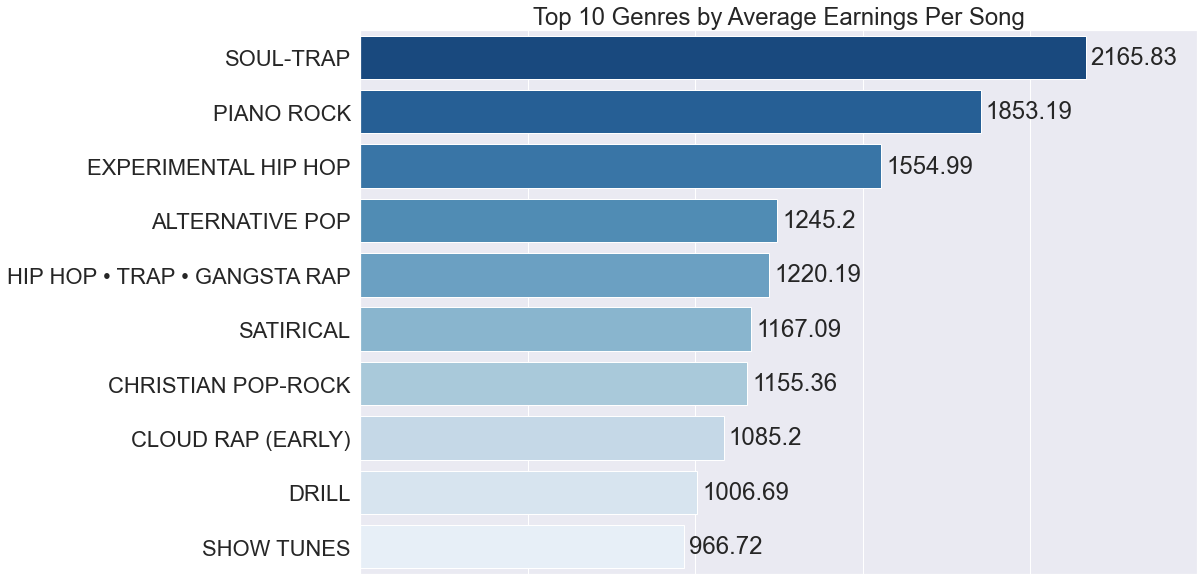

In [58]:
#top 10 genres by avg earning visualization
top_genres_earnings_avg_g = sns.barplot(x="average earnings", y="genre", data=top_genre_earnings_avg,
                 palette="Blues_r")

#make plot bigger so value labels don't run off graph
#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xlim-in-python/
top_genres_earnings_avg_g.set_xlim(0, 2500)

#add chart title
top_genres_earnings_avg_g.set_title("Top 10 Genres by Average Earnings Per Song")

#remove x axis label and values
#https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot
top_genres_earnings_avg_g.set(xlabel=None)
top_genres_earnings_avg_g.set(xticklabels=[])

#remove y axis label
top_genres_earnings_avg_g.set(ylabel=None)

#add value labels to each bar
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html
top_genres_earnings_avg_g.bar_label(top_genres_earnings_avg_g.containers[0], padding=5)